In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('Customer churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [4]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum().sum()

np.int64(0)

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
df["customerID"].duplicated().sum()

np.int64(0)

#converted 0 and 1 values of senoir citizen to yes/no to make it easier to understand

In [9]:
def conv(value):
    if value==1:
        return "yes"
    else:
        return "no"
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

In [10]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


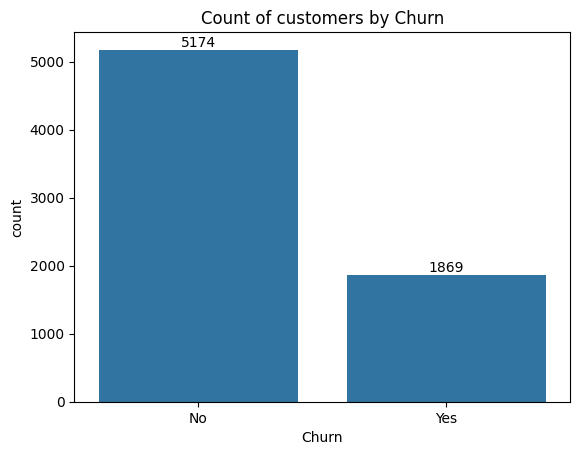

In [11]:
ax=sns.countplot(x='Churn',data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Churn")
plt.show()

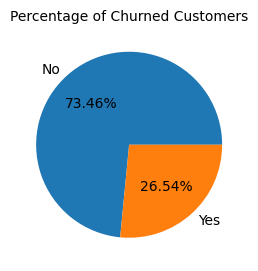

In [12]:
plt.figure(figsize=(3,4))
gb=df.groupby('Churn').agg({'Churn':"count"})
plt.pie(gb['Churn'],labels=gb.index,autopct= "%1.2f%%")
plt.title("Percentage of Churned Customers",fontsize=10)
plt.show()

#From the given chart we can conclude that 26.54% of our customers have churned out
#Now lets explore reason behind it

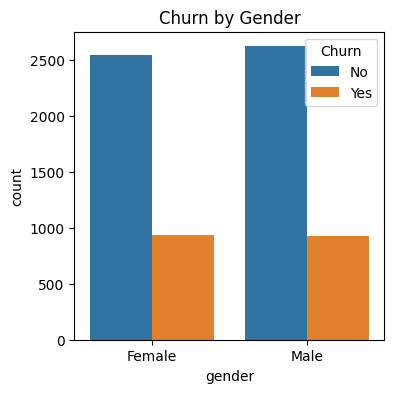

In [13]:
plt.figure(figsize= (4,4))
sns.countplot(x='gender',data=df,hue= 'Churn')
plt.title('Churn by Gender')
plt.show()

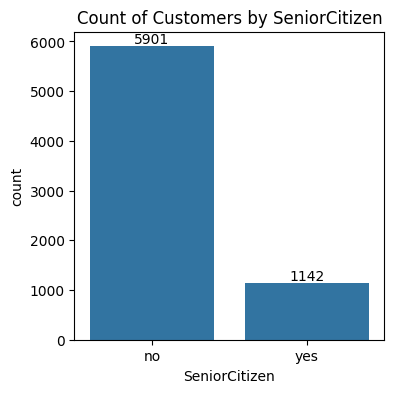

In [14]:
plt.figure(figsize= (4,4))
ax=sns.countplot(x='SeniorCitizen',data=df)
ax.bar_label(ax.containers[0])
plt.title('Count of Customers by SeniorCitizen')
plt.show()

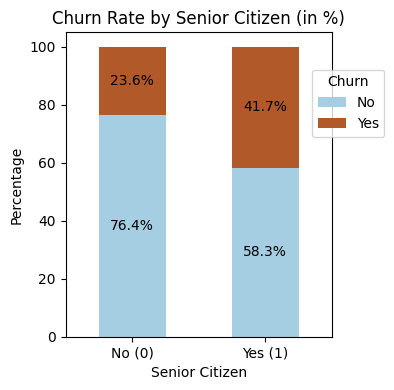

In [15]:
data = df.groupby(['SeniorCitizen', 'Churn']).size().unstack().fillna(0)

# Step 2: Calculate percentages
data_percent = data.div(data.sum(axis=1), axis=0) * 100

# Step 3: Plot
ax = data_percent.plot(kind='bar', stacked=True, figsize=(4, 4), colormap='Paired')

# Step 4: Add percentage labels
for i, row in enumerate(data_percent.values):
    bottom = 0
    for j, val in enumerate(row):
        if val > 0:
            ax.text(i, bottom + val / 2, f"{val:.1f}%", ha='center', va='center', fontsize=10)
            bottom += val

# Step 5: Formatting
plt.title("Churn Rate by Senior Citizen (in %)")
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen")
plt.xticks(ticks=[0, 1], labels=['No (0)', 'Yes (1)'], rotation=0)
plt.legend(title='Churn',bbox_to_anchor=(0.9,0.9))  #customize legend location
plt.tight_layout()
plt.show()

# comparatively a greater percentage of people in senior citizen category have churned

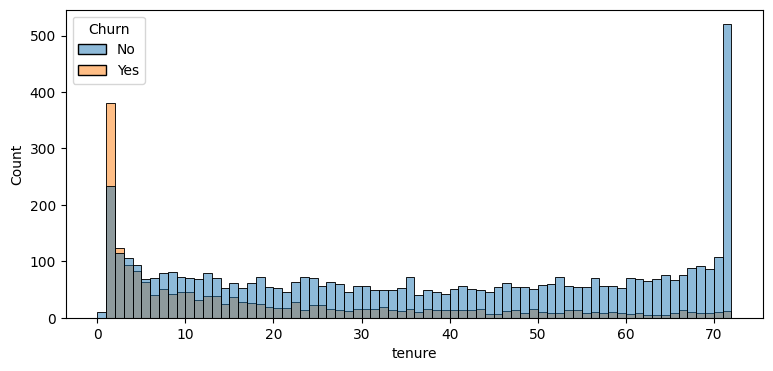

In [16]:
plt.figure(figsize= (9,4))
sns.histplot(x='tenure',data=df,bins=72,hue='Churn')
plt.show()

people who have used our services for a long time have stayed and people who have used our services for one or two month have churned

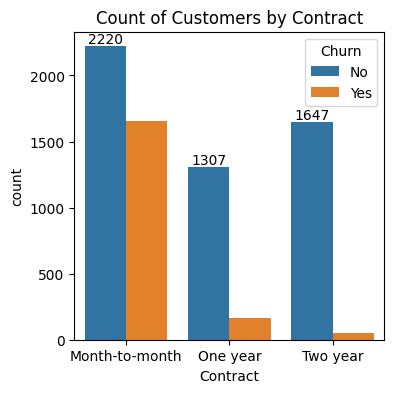

In [17]:
plt.figure(figsize= (4,4))
ax=sns.countplot(x='Contract',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
plt.title('Count of Customers by Contract')
plt.show()

people who have month to month contract are likely to churn then from those who have 1 or 2 years of contract

In [18]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

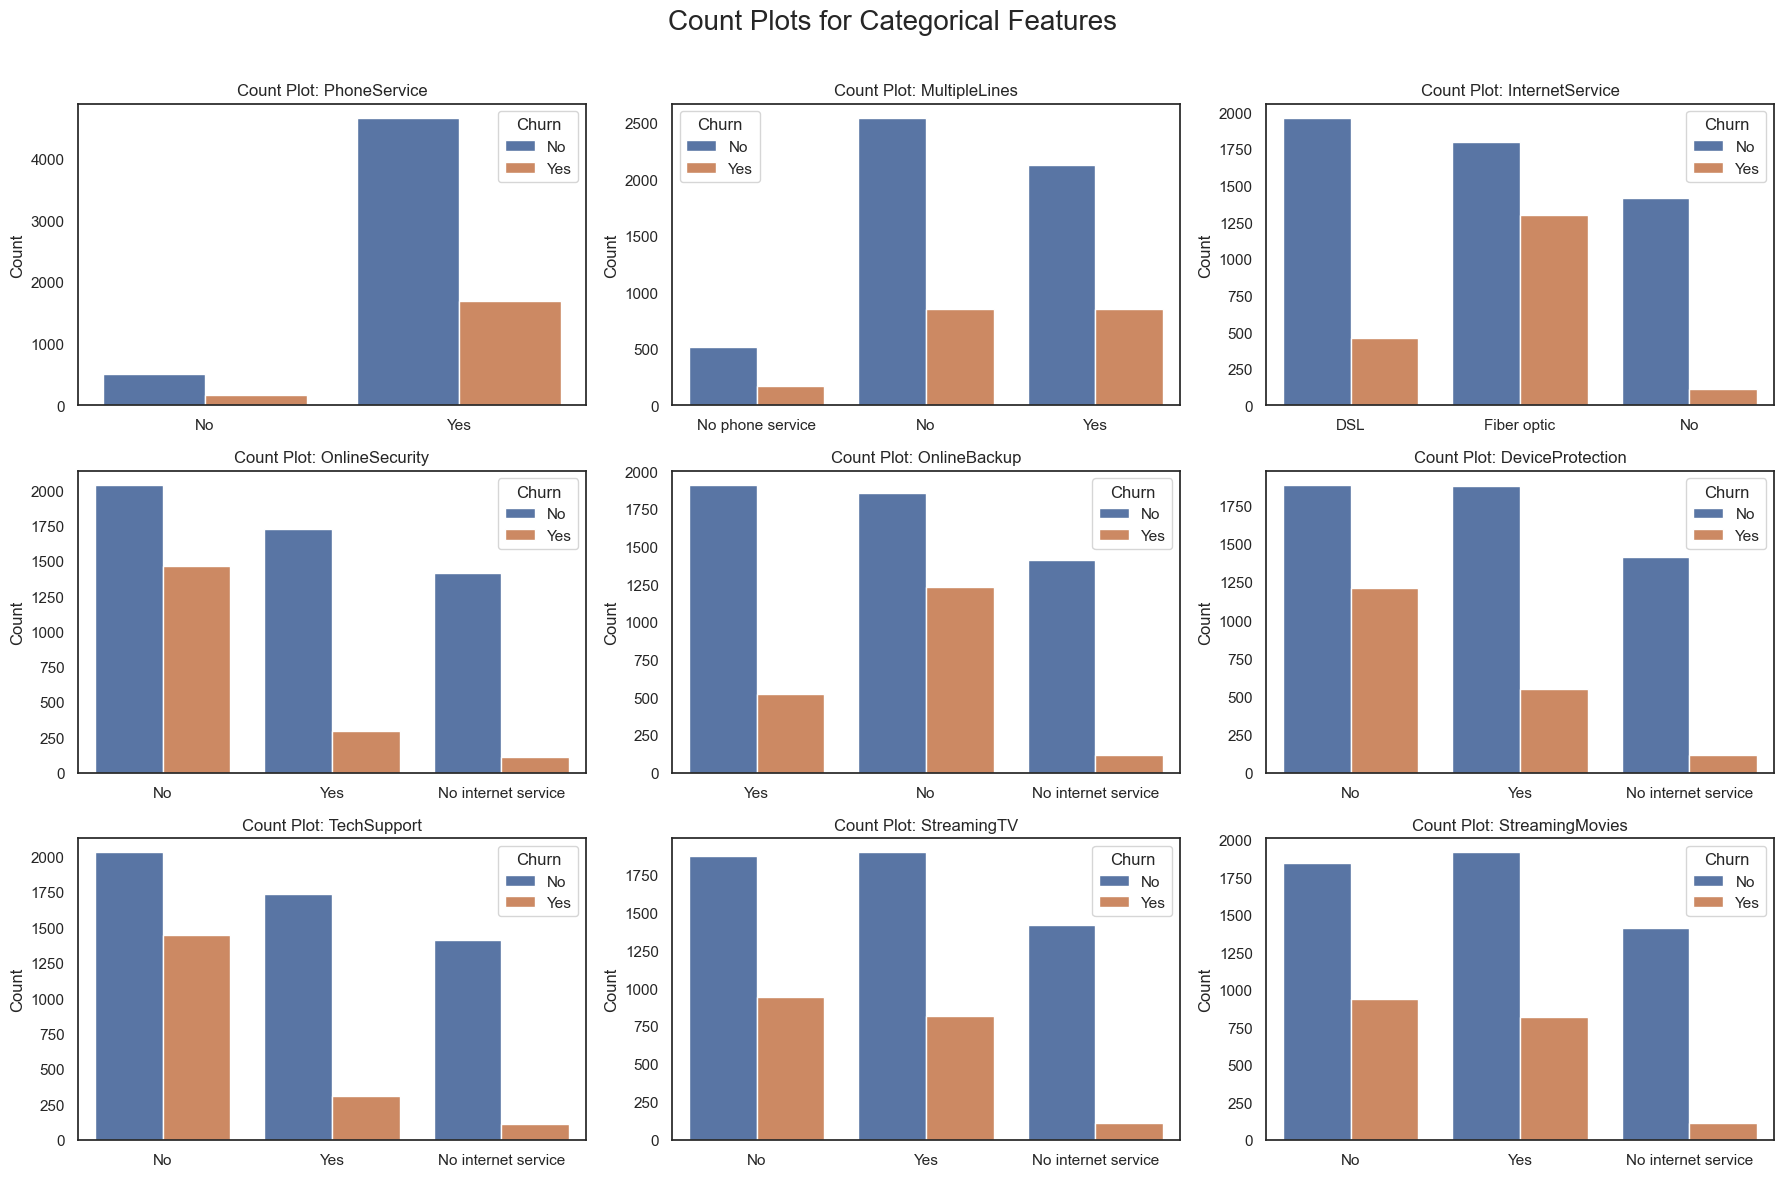

In [19]:
# Your columns of interest
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set plot style
sns.set(style="white")

palette={"No": "#1f77b4", "Yes": "#ff7f0e"}


# Set up the subplots (3 rows x 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
fig.suptitle('Count Plots for Categorical Features', fontsize=20)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, ax=axes[i],hue=df['Churn'])
    axes[i].set_title(f'Count Plot: {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
   
# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Leave space for the main title
plt.show()

 The majority of customers who do not churn tend to have services like PhoneService,InternetService(particularly DSL and OnlineSecurity enabled.For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.

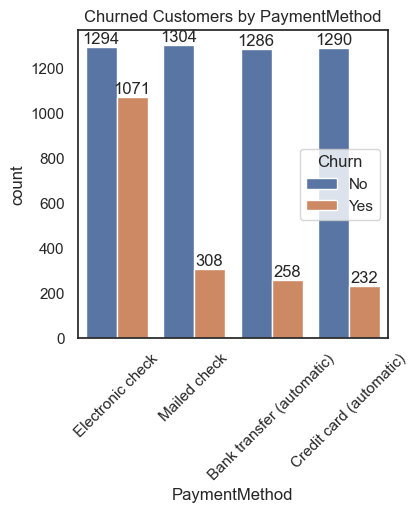

In [26]:
plt.figure(figsize= (4,4))
ax=sns.countplot(x='PaymentMethod',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation= 45)
plt.title('Churned Customers by PaymentMethod')
plt.show()

customer is likely to churn when he is using electronic check as payment method. 

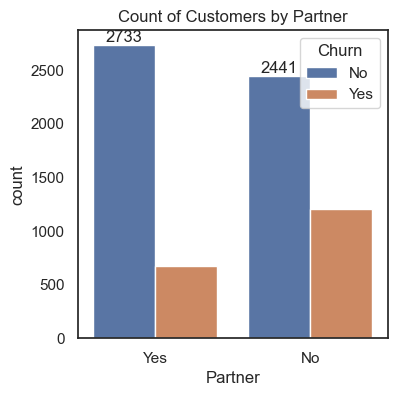

In [30]:
plt.figure(figsize= (4,4))
ax=sns.countplot(x='Partner',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
plt.title('Count of Customers by Partner')

plt.show()

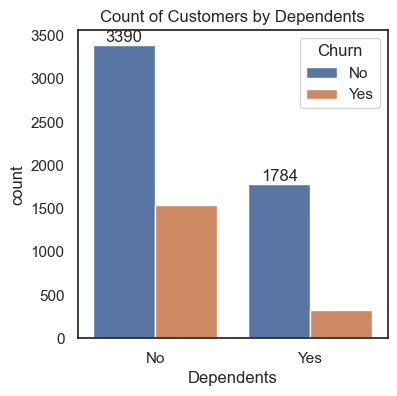

In [33]:
plt.figure(figsize= (4,4))
ax=sns.countplot(x='Dependents',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
plt.title('Count of Customers by Dependents')

plt.show()